In [1]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import warnings #Used primarily to ignore warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')

In [3]:
labels = []
values = []

for col in df.columns:
    if col not in ["ID", "target"]:
        labels.append(col)
        values.append(spearmanr(df[col].values, df['target'].values)[0])

correlation_df = pd.DataFrame({'column_label':labels, 'correlation_val':values})        
correlation_df = correlation_df.sort_values(by='correlation_val')

correlation_df = correlation_df[(correlation_df['correlation_val']>0.1) | (correlation_df['correlation_val']<-0.1)]

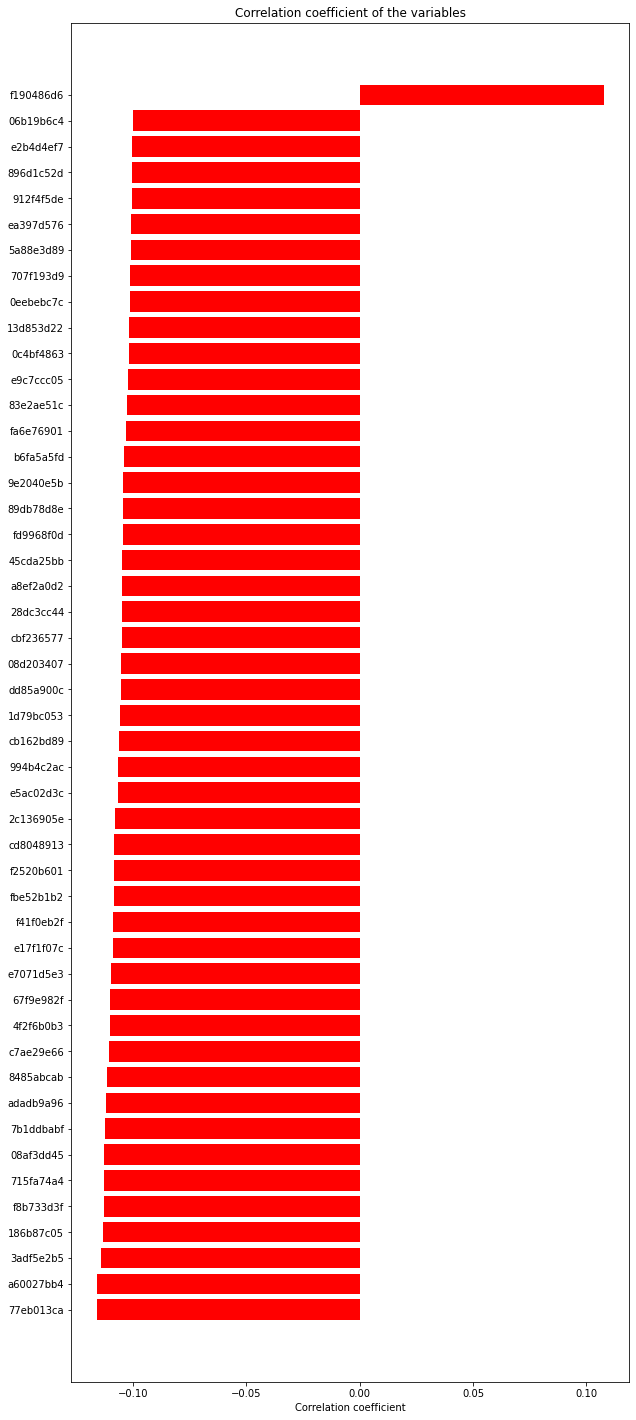

In [4]:
index = np.arange(correlation_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,25))
rec = ax.barh(index, np.array(correlation_df.correlation_val.values), color='r')
ax.set_yticks(index) #Set Y to index value of the df
ax.set_yticklabels(correlation_df.column_label.values, rotation='horizontal') #Define horizontal bar graph
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()